In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
from keras.applications import VGG16

In [3]:
vgg = VGG16()

553467904/553467096 [==============================] - 15s 0us/step


In [4]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
im = cv2.resize(cv2.imread('../dataset/image/cat.jpg'), (224, 224)).astype(np.float32)

In [15]:
im = np.expand_dims(im, axis=0)

In [16]:
model = VGG16('../models/h5/vgg16_weights.h5')

In [17]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
model.compile(optimizer='sgd', loss='categorical_crossentropy')

In [19]:
out = model.predict(im)

In [20]:
print(np.argmax(out))

285


In [22]:
model2 = VGG16(weights='imagenet', include_top=True)

In [23]:
model2.compile(optimizer='sgd', loss='categorical_crossentropy')

In [24]:
im = cv2.resize(cv2.imread('../dataset/image/steam-locomotive.jpg'), (224, 224)).astype(np.float32)

In [25]:
im = np.expand_dims(im, axis = 0)

In [26]:
out = model.predict(im)
index = np.argmax(out)
print(index)

820


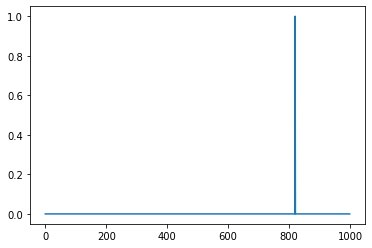

In [27]:
plt.plot(out.ravel())
plt.show()

In [28]:
## 딥러닝 모델 재활용

In [29]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import models
from keras.preprocessing import image
import numpy as np
import cv2

In [30]:
base_model = VGG16(weights='imagenet', include_top=True)
print(base_model)
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, layer.output_shape)

0 input_4 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


In [31]:
model = models.Model(inputs=base_model.input, outputs = base_model.get_layer('block4_pool').output)

In [32]:
img_path = '../dataset/image/cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))

In [33]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [34]:
features = model.predict(x)

In [35]:
print(features)

[[[[  0.         0.        39.127655 ...   0.         0.
      0.      ]
   [  0.         0.         0.       ...   0.       261.40973
      0.      ]
   [  0.         0.         0.       ...   0.       376.41425
      0.      ]
   ...
   [  0.         0.         0.       ...   0.       175.46494
      0.      ]
   [  0.         0.        32.00825  ...   0.         0.
      0.      ]
   [  0.         0.        76.28149  ...   0.         0.
      0.      ]]

  [[  0.         0.         0.       ...   0.        50.92023
      0.      ]
   [  0.         0.        44.452904 ...   0.       123.95452
      0.      ]
   [  0.         0.        27.892153 ...   0.       573.44165
      0.      ]
   ...
   [  0.         0.         0.       ...   0.       683.4282
      0.      ]
   [  0.         0.         0.       ...   0.        18.34751
      0.      ]
   [  0.         0.        60.561913 ...   0.         0.
      0.      ]]

  [[  0.         0.        27.617643 ...   0.         0.
      0.  